In [1]:
import pandas as pd
import numpy as np

import seaborn as sbn
import matplotlib.pyplot as plt

In [11]:
from keras.utils import to_categorical
from keras.datasets import mnist
from keras.models import load_model

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
(_,_),(x_test,y_test)=mnist.load_data()

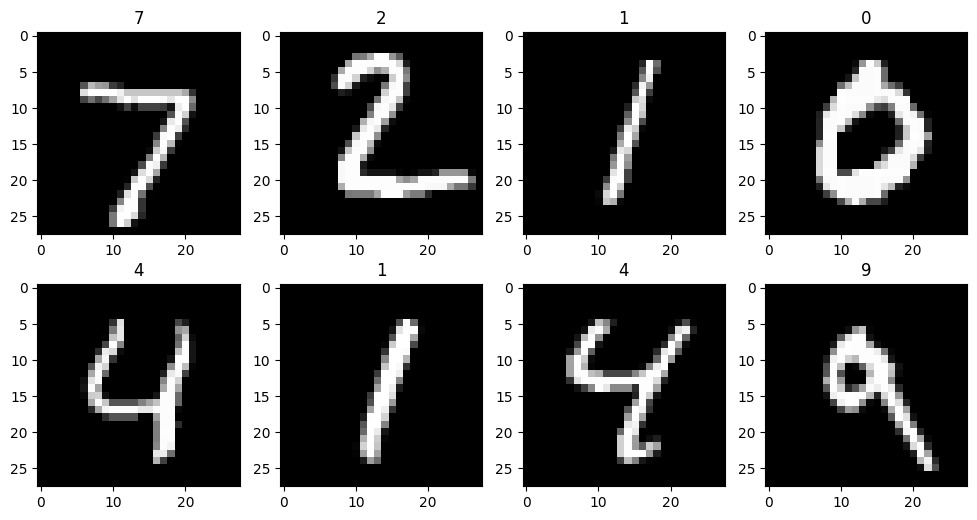

In [5]:
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i],cmap="gray")
    plt.title(y_test[i])
plt.show()

In [6]:
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_test.shape)
print(x_test.shape[0], "train samples")

x_train shape: (10000, 28, 28, 1)
10000 train samples


In [7]:
# convert class vectors to binary class matrices
y_test = to_categorical(y_test, num_classes)

In [12]:
model=load_model("model.h5")

In [15]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [22]:
y_pred_df=pd.DataFrame(y_pred,columns=["0","1","2","3","4","5","6","7","8","9"])
y_test_df=pd.DataFrame(y_test,columns=["0","1","2","3","4","5","6","7","8","9"])

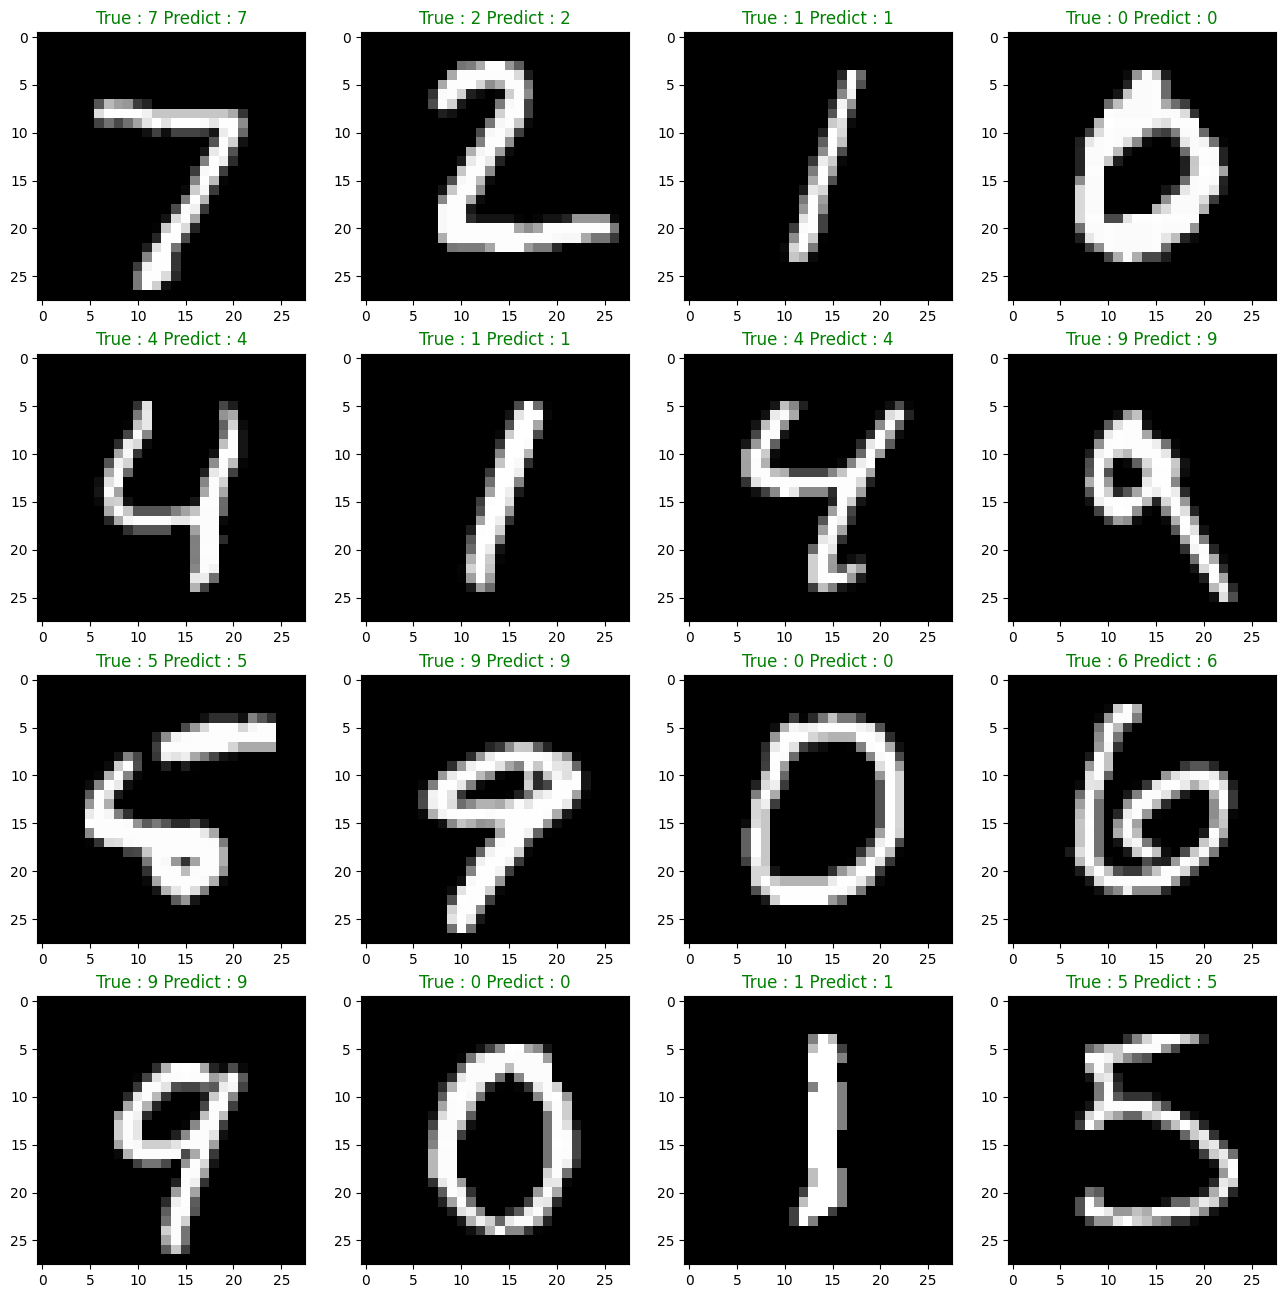

In [32]:
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_test[i],cmap="gray")
    title="True : "+str(y_test_df.iloc[i].idxmax())+" Predict : "+str(y_pred_df.iloc[i].idxmax())
    font={'color':'green'}
    if(y_test_df.iloc[i].idxmax()!=y_pred_df.iloc[i].idxmax()):
        font={'color':'red'}
    plt.title(title,fontdict=font)
plt.show()

In [39]:
true=y_test_df.idxmax(axis=1)
pred=y_pred_df.idxmax(axis=1)

In [40]:
confusion_matrix(true,pred)

array([[ 978,    0,    0,    0,    0,    0,    0,    1,    1,    0],
       [   0, 1129,    2,    1,    0,    1,    0,    2,    0,    0],
       [   1,    0, 1018,    5,    0,    0,    0,    7,    1,    0],
       [   0,    0,    1, 1006,    0,    2,    0,    1,    0,    0],
       [   0,    0,    0,    0,  981,    0,    0,    0,    0,    1],
       [   0,    0,    0,    8,    0,  882,    1,    1,    0,    0],
       [   2,    2,    0,    1,    2,    9,  940,    0,    2,    0],
       [   0,    2,    1,    0,    0,    0,    0, 1024,    1,    0],
       [   1,    0,    1,    4,    0,    1,    0,    2,  963,    2],
       [   1,    0,    0,    3,    8,    3,    0,    5,    1,  988]],
      dtype=int64)

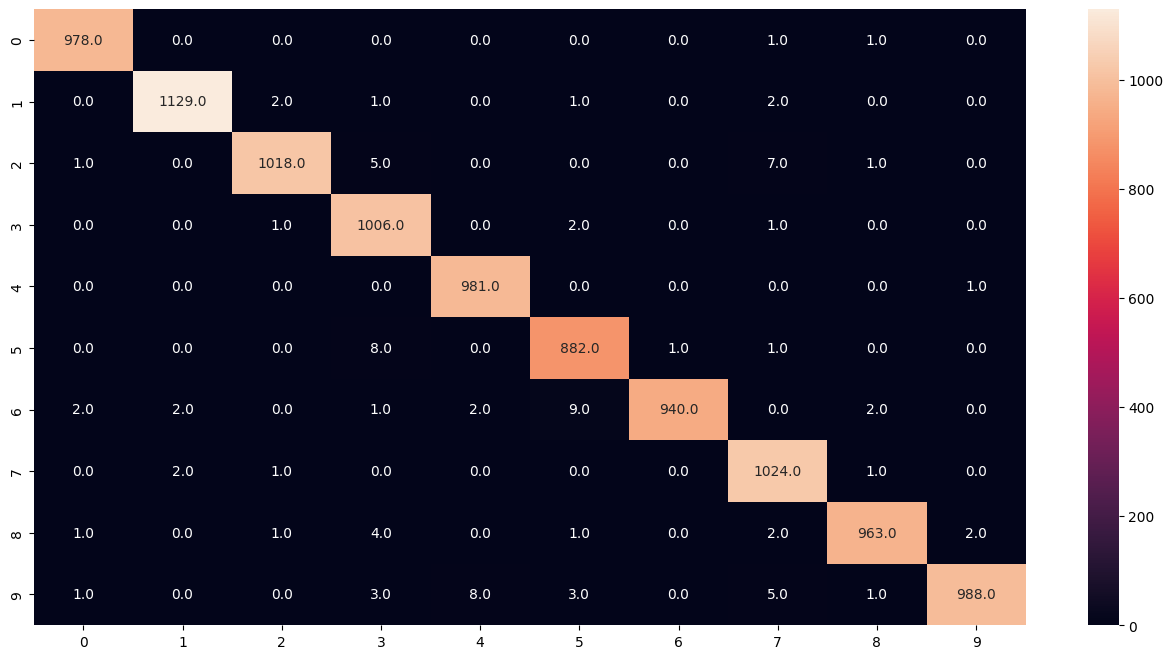

In [44]:
plt.figure(figsize=(16,8))
sbn.heatmap(confusion_matrix(true,pred),annot=True,fmt=".1f")
plt.show()